In [1]:
import pandas as pd
import numpy as np


In [2]:
covid_word = pd.read_csv('../input/dataset/owid-covid-data.csv')
covid_word

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163313,ZWE,Africa,Zimbabwe,2022-02-16,232213.0,610.0,210.429,5379.0,5.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
163314,ZWE,Africa,Zimbabwe,2022-02-17,232598.0,385.0,222.571,5381.0,2.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
163315,ZWE,Africa,Zimbabwe,2022-02-18,233030.0,432.0,259.429,5385.0,4.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
163316,ZWE,Africa,Zimbabwe,2022-02-19,233224.0,194.0,275.000,5386.0,1.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


Let's study our DataSet. As you can see, it consist of 163318 rows × 67 columns. There is some missing data are observed in the DataSet. We should be sure that Python recognized types of data correctly.


In [3]:
covid_word.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163318 entries, 0 to 163317
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    163318 non-null  object 
 1   continent                                   153531 non-null  object 
 2   location                                    163318 non-null  object 
 3   date                                        163318 non-null  object 
 4   total_cases                                 160326 non-null  float64
 5   new_cases                                   160247 non-null  float64
 6   new_cases_smoothed                          159096 non-null  float64
 7   total_deaths                                142603 non-null  float64
 8   new_deaths                                  142759 non-null  float64
 9   new_deaths_smoothed                         142629 non-null  float64
 

As you can see, 66 columns of COVID-19 data were recognized correctly (float64). First 4 columns and tests_units were recognized as objects. Let's investigate them:


In [4]:
fields = ['iso_code', 'continent', 'location', 'tests_units']
covid_word[fields]

,iso_code,continent,location,tests_units
0,AFG,Asia,Afghanistan,NaN
1,AFG,Asia,Afghanistan,NaN
2,AFG,Asia,Afghanistan,NaN
3,AFG,Asia,Afghanistan,NaN
4,AFG,Asia,Afghanistan,NaN
...,...,...,...,...
163313,ZWE,Africa,Zimbabwe,tests performed
163314,ZWE,Africa,Zimbabwe,tests performed
163315,ZWE,Africa,Zimbabwe,tests performed
163316,ZWE,Africa,Zimbabwe,NaN


Let's show information about the field date.


In [5]:
covid_word['date']

0         2020-02-24
1         2020-02-25
2         2020-02-26
3         2020-02-27
4         2020-02-28
             ...    
163313    2022-02-16
163314    2022-02-17
163315    2022-02-18
163316    2022-02-19
163317    2022-02-20
Name: date, Length: 163318, dtype: object

### Сhange the data types of columns


As you can see, the columns: 'iso_code', 'continent', 'location', 'tests_units' have many repetitions and should be assigned to categorical fields **pandas.astype()**. 

The field 'data' should be converted into DataTime type **pandas.to_datetime**  
To see the results we can use **pandas.describe()**.


In [6]:
fields = ['iso_code', 'continent', 'location', 'tests_units']
covid_word[fields] =covid_word[fields].astype('category')
covid_word.loc[:, 'date'] = pd.to_datetime(covid_word['date'])
covid_word[fields].describe()

,iso_code,continent,location,tests_units
count,163318,153531,163318,84863
unique,238,6,238,4
top,ARG,Africa,Argentina,tests performed
freq,782,38702,782,62231


### Rows filtering


As we can see, the DataSet contains information about 6 continents and 238 countries.
The field 'tests_units' consist of 4 categories. To show a list of countries, we can use **pandas.Series.cat.categories**.


In [7]:
covid_word['location'].cat.categories

Index(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Uzbekistan', 'Vanuatu', 'Vatican', 'Venezuela', 'Vietnam',
       'Wallis and Futuna', 'World', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=238)

Let's investigate the dynamics of new cases of COVID-19 for a separate country. We will use India for saving models and further forecast. You can use your country. Let's use a pandas filter to do this.


In [8]:

c_covid = covid_word[covid_word['location'] == "India"]
c_covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
68427,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
68428,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
68429,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
68430,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
68431,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69175,IND,Asia,India,2022-02-16,42754315.0,30757.0,39465.000,510413.0,541.0,556.143,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
69176,IND,Asia,India,2022-02-17,42780235.0,25920.0,34871.143,510905.0,492.0,532.571,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
69177,IND,Asia,India,2022-02-18,42802505.0,22270.0,30851.571,511230.0,325.0,464.143,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
69178,IND,Asia,India,2022-02-19,42822473.0,19968.0,27293.143,511903.0,673.0,462.571,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN


Let's choose the fields 'new_cases', 'new_cases_smoothed' for forecasting. First of all, we should visualize this data.


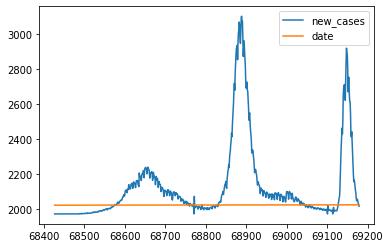

In [9]:
import matplotlib.pyplot as plt
fields = ['new_cases', 'date']
c_covid[fields].plot()
plt.show()

### Elimination of missing data


As you can see, there are large fluctuations in the new cases plot. Let's try to make a forecast for these waves.
First of all, we should delete missing data using **pandas.DataFrame.dropna()**


In [10]:
c_covid = c_covid[fields].dropna()
c_covid

,new_cases,date
68427,1.0,2020-01-30
68428,0.0,2020-01-31
68429,0.0,2020-02-01
68430,1.0,2020-02-02
68431,1.0,2020-02-03
...,...,...
69175,30757.0,2022-02-16
69176,25920.0,2022-02-17
69177,22270.0,2022-02-18
69178,19968.0,2022-02-19


### Data transformation


 To check for dependencies, it is necessary to perform a correlation analysis between them. This requires:

1.  duplicating of data and moving it vertically down for a certain number of days (lag)
2.  deleting the missing data at the beginning and end **pandas.DataFrame.shift()**
3.  calculating the correlation coefficient between the obtained series.

It is convenient to create a separate function for lag:


In [11]:
def lag_correlation_ts(y, x, lag):
    """
   
    y: fixed
    x: shifted
    lag: lag for shifting
    r: DataFrame of lags correlation coefficients
    """
    r = [0] * (lag + 1)
    y = y.copy()
    x = x.copy()
    y.name = "y"
    x.name = "x"

    for i in range(0, lag + 1):
        ds = y.copy().to_frame()
        ds = ds.join(x.shift(i), how='outer')
        r[i] = ds.corr().values[0][1]
    r = pd.DataFrame(r)
    r.index.names = ['Lag']
    r.columns = ['Correlation']
    return r

Let's create a target DataSet.


In [12]:
y_dataset = c_covid[['new_cases','date']]
y_dataset

,new_cases,date
68427,1.0,2020-01-30
68428,0.0,2020-01-31
68429,0.0,2020-02-01
68430,1.0,2020-02-02
68431,1.0,2020-02-03
...,...,...
69175,30757.0,2022-02-16
69176,25920.0,2022-02-17
69177,22270.0,2022-02-18
69178,19968.0,2022-02-19


# Phophet

In [13]:
from fbprophet import Prophet

In [14]:
fb_confirm = y_dataset.rename(columns={'date': 'ds',
                        'new_cases': 'y'})

fb_confirm.head()

,y,ds
68427,1.0,2020-01-30
68428,0.0,2020-01-31
68429,0.0,2020-02-01
68430,1.0,2020-02-02
68431,1.0,2020-02-03


In [15]:
# evaluate prophet time series forecasting model on hold out dataset
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
# load data
df=fb_confirm
m = Prophet()
m.fit(df)

Initial log joint probability = -21.8103
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      79       1096.28    0.00317786       111.785   4.367e-05       0.001      130  LS failed, Hessian reset 
      99       1096.48   1.19816e-05       66.5165      0.1541           1      162   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1096.79   0.000206189        64.839           1           1      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     281       1098.19    0.00746614       104.289   8.642e-05       0.001      415  LS failed, Hessian reset 
     299       1098.63   0.000186619       77.8955      0.7467      0.7467      437   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     310       1098.65   5.14089e-05       69.7286   7.735e-07       0.001      491  LS failed, Hessian rese

     63.1837   8.655e-08       0.001      575  LS failed, Hessian reset 
     366       1098.65   8.49822e-09       61.6695     0.08681     0.08681      596   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


In [16]:
future = m.make_future_dataframe(periods= 14, freq='D')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail()
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,-31468.834069,-67808.651327,74295.829385,-31468.834069,-31468.834069,32317.915179,32317.915179,32317.915179,2625.751712,2625.751712,2625.751712,29692.163467,29692.163467,29692.163467,0.0,0.0,0.0,849.081110
1,2020-01-31,-31281.902708,-74536.836030,56793.898064,-31281.902708,-31281.902708,25612.470542,25612.470542,25612.470542,2004.721462,2004.721462,2004.721462,23607.749081,23607.749081,23607.749081,0.0,0.0,0.0,-5669.432165
2,2020-02-01,-31094.971347,-84150.166522,55840.510306,-31094.971347,-31094.971347,19100.529447,19100.529447,19100.529447,1776.161747,1776.161747,1776.161747,17324.367700,17324.367700,17324.367700,0.0,0.0,0.0,-11994.441899
3,2020-02-02,-30908.039986,-88549.456762,44258.243231,-30908.039986,-30908.039986,9819.552676,9819.552676,9819.552676,-1127.829244,-1127.829244,-1127.829244,10947.381920,10947.381920,10947.381920,0.0,0.0,0.0,-21088.487310
4,2020-02-03,-30721.108625,-101877.882038,41029.819393,-30721.108625,-30721.108625,-2673.491462,-2673.491462,-2673.491462,-7254.091055,-7254.091055,-7254.091055,4580.599593,4580.599593,4580.599593,0.0,0.0,0.0,-33394.600087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,2022-03-02,122803.682542,36952.834485,175101.943025,122735.613849,122877.578071,-12592.854429,-12592.854429,-12592.854429,3265.351898,3265.351898,3265.351898,-15858.206327,-15858.206327,-15858.206327,0.0,0.0,0.0,110210.828113
763,2022-03-03,123122.084073,41326.333352,177126.151502,123024.127967,123223.841796,-11544.253807,-11544.253807,-11544.253807,2625.751712,2625.751712,2625.751712,-14170.005519,-14170.005519,-14170.005519,0.0,0.0,0.0,111577.830265
764,2022-03-04,123440.485603,50417.992267,186802.170934,123306.262857,123573.438266,-10718.606832,-10718.606832,-10718.606832,2004.721462,2004.721462,2004.721462,-12723.328294,-12723.328294,-12723.328294,0.0,0.0,0.0,112721.878771
765,2022-03-05,123758.887134,45459.030089,184935.081416,123603.373635,123930.000657,-9751.976909,-9751.976909,-9751.976909,1776.161747,1776.161747,1776.161747,-11528.138656,-11528.138656,-11528.138656,0.0,0.0,0.0,114006.910225


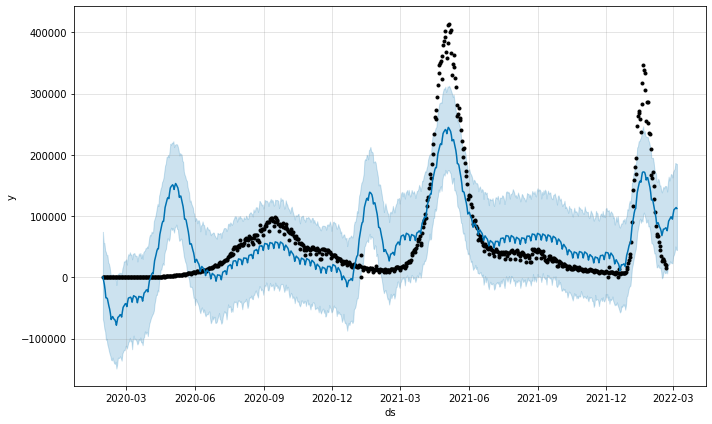

In [17]:
fig1 = m.plot(forecast)

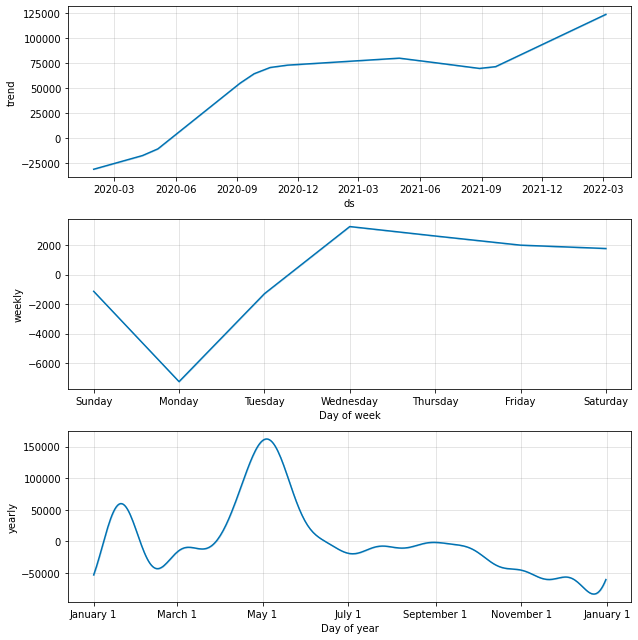

In [18]:
fig2 = m.plot_components(forecast)

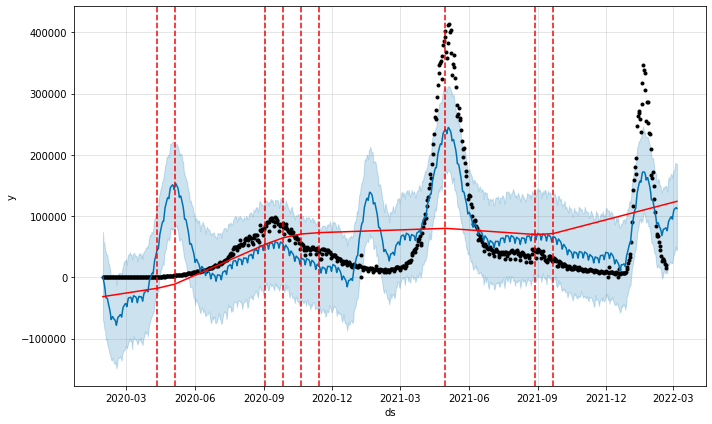

In [19]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)